### Tokenize




doc_list = 敘述

label = 分類

In [ ]:
# label_dict = {"奇幻冒險 ":1, "青春校園 ":2 , "溫馨 ":3, "幽默搞笑 " :4, "社會寫實 ":5,
#         "科幻未來 ":6, "戀愛 ":7, "幽默搞笑 ":8, "歷史傳記 ":9, "靈異神怪 ":10 ,
#         "運動競技 ":11, "料理美食 ":12, '推理懸疑 ':13, "其他 ":14 }

In [ ]:
# 合併小的class
# label_dict = {"奇幻冒險 ":1, "青春校園 ":2 , "溫馨 ":3, "幽默搞笑 " :4, "社會寫實 ":5,
#         "科幻未來 ":6, "戀愛 ":7, "幽默搞笑 ":8, "歷史傳記 ":9, "靈異神怪 ":5 ,
#         "運動競技 ":11, "料理美食 ":12, '推理懸疑 ':5, "其他 ":5 }

**read file** 

finaltry.csv & tm crawling.csv

### [Build tfidf](https://br19920702.medium.com/%E7%B9%81%E4%B8%AD%E9%97%9C%E9%8D%B5%E5%AD%97%E8%90%83%E5%8F%96-extract-keywords-%E9%81%8B%E7%94%A8-ckiptagger-%E8%88%87-scikit-learn-boom%E5%87%BA%E6%96%B0%E5%97%9E%E5%91%B3-3ec3e681bdec)

change path!!!!


In [2]:
corpus = []
with open('./char_corpus.txt',encoding="utf-8") as file:
    for line in file:
        corpus.append(line)

In [101]:
label = []
with open('./char_class5.txt') as file:
    for line in file:
        class_ = int(line)
        label.append(class_)

In [102]:
print(label[:50])

[1, 13, 13, 13, 13, 6, 1, 1, 13, 1, 4, 6, 1, 7, 6, 13, 1, 13, 7, 6, 6, 1, 1, 1, 13, 1, 13, 1, 1, 6, 4, 7, 6, 13, 13, 1, 13, 7, 1, 1, 6, 4, 1, 1, 1, 1, 4, 13, 1, 1]


 [Stop words](https://github.com/FontTian/NLP_tools/blob/master/NLP/stopwords/stopwords1893.txt
)

In [ ]:
# stopword txt file 
# 哈爾濱工業大學 1893個中文與非中文stopwords集 
# !gdown --id '1HCF0RLMwy06XZgejQEelCY0NyUBRAn6o'

with open('./stopwords1893.txt', encoding='utf-8') as f:
    stop_word = f.read()
sw = stop_word.split('\n')

### [Build tfidf](https://br19920702.medium.com/%E7%B9%81%E4%B8%AD%E9%97%9C%E9%8D%B5%E5%AD%97%E8%90%83%E5%8F%96-extract-keywords-%E9%81%8B%E7%94%A8-ckiptagger-%E8%88%87-scikit-learn-boom%E5%87%BA%E6%96%B0%E5%97%9E%E5%91%B3-3ec3e681bdec)


In [93]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# max_df: ignore terms that have a document frequency (比率或次數) higher than the given threshold

text_cv = CountVectorizer(max_df=0.8, min_df=5, stop_words=sw)  #
td_matrix = text_cv.fit_transform(corpus)

print (td_matrix.shape)
print (text_cv.vocabulary_.keys())

c:\users\jenna\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['lex', '①①', '①②', '①③', '①④', '①⑤', '①⑥', '①⑦', '①⑧', '①⑨', '①ａ', '①ｂ', '①ｃ', '①ｄ', '①ｅ', '①ｆ', '①ｇ', '①ｈ', '①ｉ', '①ｏ', '②①', '②②', '②③', '②④', '②⑤', '②⑥', '②⑦', '②⑧', '②⑩', '②ａ', '②ｂ', '②ｄ', '②ｅ', '②ｆ', '②ｇ', '②ｈ', '②ｉ', '②ｊ', '③①', '③⑩', '③ａ', '③ｂ', '③ｃ', '③ｄ', '③ｅ', '③ｆ', '③ｇ', '③ｈ', '④ａ', '④ｂ', '④ｃ', '④ｄ', '④ｅ', '⑤ａ', '⑤ｂ', '⑤ｄ', '⑤ｅ', '⑤ｆ', '１２', 'ｌｉ', 'ｚｘｆｉｔｌ'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


(1100, 29658)
dict_keys(['竈門', '炭治郎', '配音', '花江', '夏樹', '佐藤聰美', '童年', '時期', '日本', '錢欣郁', '台灣', '星潮', '幽舞', '越山', '中國', '大陸', '張振熙', '陳姻岐', 'viu', '曹啟謙', '雷碧娜', 'tvb', '李震權', '通版', '香港', 'zach', 'aguilar', 'allegra', 'clark', '美國', '演員', '小林亮太', '日语', '舞台劇', '主人公', '長子', '豆子', '大哥', '造型', '制服', '市松', '圖案', '羽織', '紅髮', '紅色', '眼睛', '赫灼', '遺傳', '母親', '有如', '石頭', '堅硬', '額頭', '左額', '小時候', '保護', '弟弟', '滾燙', '水壺', '燒傷', '傷痕', '最終', '選拔', '手鬼', '撞擊', '導致', '身體', '恢復', '顏色', '變深', '日輪', '花紙', '耳飾', '平凡', '農家', '子弟', '長兄', '父親', '早逝', '生計', '第一', '人氣', '投票', '6742', '第1', '9045', '第4', '鬼頭', '明里', '連婉鈞', '沈念如', '楊婉潼', '瑤孆', '胡葆琳', 'abby', 'trott', '高石明里', '髙石', '主角', '長女', '大妹', '滅門', '唯一', '生還', '始祖', '鬼舞辻', '無慘', '攻擊', '沾染到', '血液', '異變', '模樣', '3319', '第3', '5042', '第11', '善逸', '下野紘', '江志倫', '李蘭陵', '杜景煜', '陳灝瑋', 'aleks', 'le', '植田', '圭輔', '植田圭輔', '鬼殺隊', '劍士', '三角形', '黃色', '金色', '短髮', '圓眉', '少年', '日輪刀', '稻妻', '刀紋', '刀鍔', '外圍', '白木瓜型', '刀柄', '白色', '目釘', '柄頭', '黃金色', '4299', '第2', '17451', '伊之', '

In [94]:
tfidf = TfidfTransformer()
tfidf_matrix = tfidf.fit_transform(td_matrix)


In [95]:
import pandas as pd
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=text_cv.vocabulary_.keys())
tfidf_df

,竈門,炭治郎,配音,花江,夏樹,佐藤聰美,童年,時期,日本,錢欣郁,...,圓圓,屋簷,臨行,發售日,上部,劇變,第13话,电影,時點,轉調
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.002427,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.002193,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
1096,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
1097,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
1098,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.049562,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0


In [96]:
dim = tfidf_df.shape[1]
dim

29658

In [103]:
tfidf_array = tfidf_matrix.A
print(type(tfidf_array))
label_array = np.array(label)
print(type(label_array))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### Training

In [66]:
# from sklearn.decomposition import TruncatedSVD
# comp = 10000
# svd_model = TruncatedSVD(n_components = comp)
# SVD_vectors = svd_model.fit_transform(tfidf_matrix)

In [135]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
print(label_array[:20])
encoder = LabelEncoder()
encoder.fit(label_array)
Y = encoder.transform(label_array)
print(Y[:20])
Y = np_utils.to_categorical(Y)
print(Y)

[ 1 13 13 13 13  6  1  1 13  1  4  6  1  7  6 13  1 13  7  6]
[0 4 4 4 4 2 0 0 4 0 1 2 0 3 2 4 0 4 3 2]
[[1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]]


In [136]:
# import tensorflow as tf
# y_train_ = tf.keras.utils.to_categorical(string_ints, num_classes=5)
# y_train_

### Split Dataset

In [137]:
import numpy as np
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(tfidf_array, Y, 
                             test_size=0.3, random_state=42)

In [68]:
# SVD_vectors.shape

(1100, 1100)

In [69]:
# type(SVD_vectors)

numpy.ndarray

In [138]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, LSTM

model = Sequential()
model.add(Embedding(dim, 16))
model.add(LSTM(16))
model.add(Dense(5, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
model.summary()


history = model.fit(x_train, y_train,
                   epochs=20,
                   batch_size = 512)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, None, 16)          474528    
                                                                 
 simple_rnn_13 (SimpleRNN)   (None, 16)                528       
                                                                 
 dense_13 (Dense)            (None, 5)                 85        
                                                                 
Total params: 475,141
Trainable params: 475,141
Non-trainable params: 0
_________________________________________________________________


In [106]:
history = model.fit(x_train, y_train,
                   epochs=20,
                   batch_size = 512)

Epoch 1/20
2/2 [==============================] - 226s 129s/step - loss: 62.3937 - acc: 0.0000e+00
Epoch 2/20
2/2 [==============================] - 253s 151s/step - loss: 61.6220 - acc: 0.0909
Epoch 3/20
2/2 [==============================] - 237s 127s/step - loss: 60.9209 - acc: 0.2883
Epoch 4/20
2/2 [==============================] - 249s 154s/step - loss: 60.3362 - acc: 0.2883
Epoch 5/20
2/2 [==============================] - 267s 163s/step - loss: 59.8281 - acc: 0.2883
Epoch 6/20
2/2 [==============================] - 235s 132s/step - loss: 59.3817 - acc: 0.2883
Epoch 7/20
2/2 [==============================] - 281s 140s/step - loss: 59.0465 - acc: 0.2883
Epoch 8/20
2/2 [==============================] - 257s 140s/step - loss: 58.7890 - acc: 0.2883
Epoch 9/20
2/2 [==============================] - 258s 145s/step - loss: 58.5622 - acc: 0.2883
Epoch 10/20
2/2 [==============================] - 263s 139s/step - loss: 58.3516 - acc: 0.2883
Epoch 11/20
2/2 [============================

In [107]:
testing_result = model.evaluate(x_test,y_test)

11/11 [==============================] - 8s 731ms/step - loss: 51.9038 - acc: 0.3455


SVM

In [ ]:
from sklearn.svm import SVC
SVM = SVC(kernel='linear', C = 3)
SVM.fit(x_train, y_train)
y_pred = SVM.predict(x_test)

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(x_train, y_train)
y_pred = neigh.predict(x_test)

### Evaluation

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score
np.set_printoptions(suppress=True)

print(metrics.classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.54      0.82      0.66       114
           2       0.14      0.14      0.14        14
           3       0.22      0.11      0.14        19
           5       0.34      0.28      0.31        39
           6       0.50      0.42      0.46        43
           7       0.26      0.16      0.20        37
           8       0.20      0.18      0.19        39
           9       0.00      0.00      0.00         5
          11       0.67      0.25      0.36        16
          12       1.00      0.50      0.67         4

    accuracy                           0.44       330
   macro avg       0.39      0.29      0.31       330
weighted avg       0.41      0.44      0.41       330

Accuracy: 0.44242424242424244


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


文字雲 (需要把同class的文檔組在一起)

In [ ]:
# !pip install wordcloud

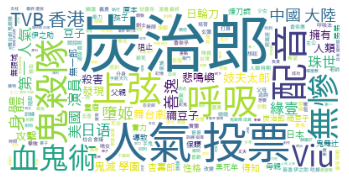

In [ ]:
# import matplotlib.pyplot as plt
# # adjust fonts for chinese words
# plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
# plt.rcParams['axes.unicode_minus'] = False

from wordcloud import WordCloud
font = 'TaipeiSansTCBeta-Regular.ttf'
my_wordcloud = WordCloud(background_color='white',font_path=font, stopwords = sw).generate(corpus[0])  #,mask=mask

plt.imshow(my_wordcloud)
plt.axis("off")
plt.show()